# ML-6 Non-Hierarchical Clustering

# Import Library

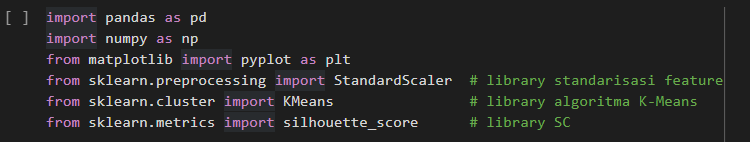

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Menginstal library machine learning visualization: [yellowbrick](https://www.scikit-yb.org/en/latest/).

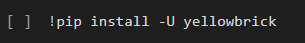

In [10]:
!pip install -U yellowbrick

Import library [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

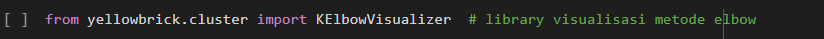

In [11]:
from yellowbrick.cluster import KElbowVisualizer

# Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on ini, kita masih menggunakan dataset Mall_Customers.csv.

Berbeda dengan materi sebelumnya, kali ini, kita akan lakukan Customer Segmentation menggunakan algoritma K-Means.

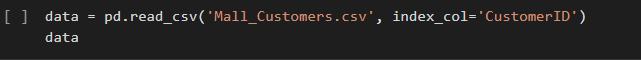

In [ ]:
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


Memeriksa kelengkapan dataset.

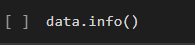

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan **SpendingScore**.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

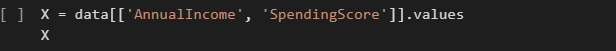

In [ ]:
X = data[['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

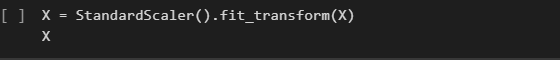

In [ ]:
X = StandardScaler().fit_transform(X)
X

array([[-4.31393298e-01, -4.21372977e-01],
       [-4.31393298e-01,  9.16824758e-01],
       [-4.24485019e-01, -1.47281405e+00],
       [-4.24485019e-01,  7.89377354e-01],
       [-4.17576739e-01, -3.89511126e-01],
       [-4.17576739e-01,  7.57515504e-01],
       [-4.10668459e-01, -1.47281405e+00],
       [-4.10668459e-01,  1.33102882e+00],
       [-4.03760179e-01, -1.56839961e+00],
       [-4.03760179e-01,  6.30068100e-01],
       [-4.03760179e-01, -1.21791925e+00],
       [-4.03760179e-01,  1.49033807e+00],
       [-3.96851899e-01, -1.18605740e+00],
       [-3.96851899e-01,  7.89377354e-01],
       [-3.96851899e-01, -1.24978110e+00],
       [-3.96851899e-01,  8.53101056e-01],
       [-3.89943619e-01, -5.48820381e-01],
       [-3.89943619e-01,  4.38896995e-01],
       [-3.76127059e-01, -7.39991486e-01],
       [-3.76127059e-01,  1.45847622e+00],
       [-3.69218779e-01, -5.48820381e-01],
       [-3.69218779e-01,  6.61929951e-01],
       [-3.62310499e-01, -1.50467591e+00],
       [-3.

# Metode Elbow

Sebelum men-training model K-Means, sebaiknya kita mencari nilai K yang paling baik/optimal terlebih dahulu.

Nilai ini bisa kita cari menggunakan Metode Elbow atau `KElbowVisualizer` pada Python.



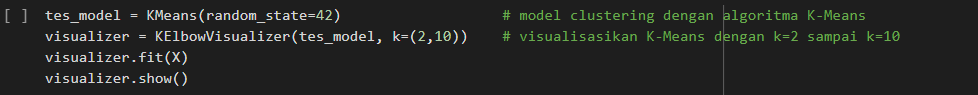

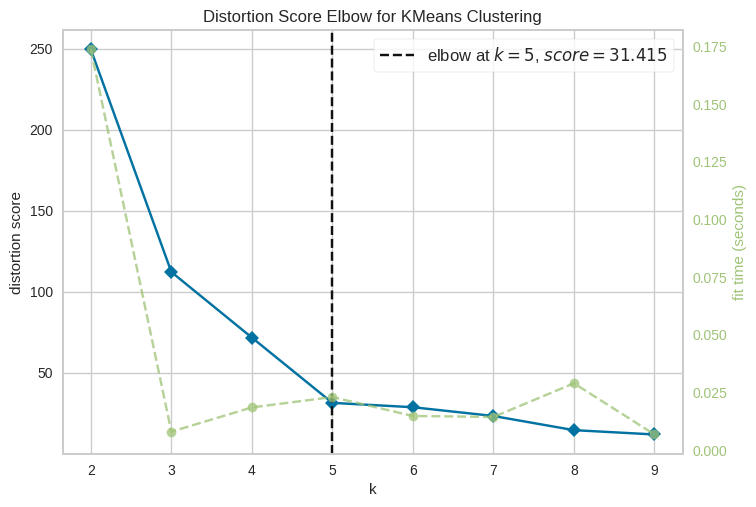

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
tes_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(X)
visualizer.show()

Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=5.

Maka nilai K terbaik/optimal adalah 5.

# Modeling

Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:
- cluster bejumlah 5 (K=5)
- random state bernilai 42

Random state berguna untuk mengontrol ke-random-an inisiasi centroid.


Kita juga bisa men-tuning hyperparameter K-Means lainnya. Baca dokumentasi lengkapnya [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

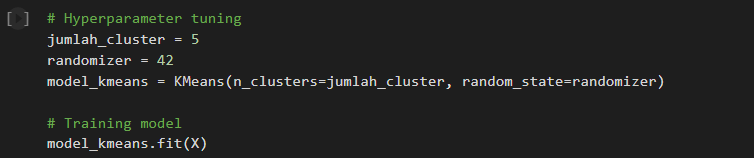

In [ ]:
# Hyperparameter tuning
jumlah_cluster = 5
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

#Training model
model_kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

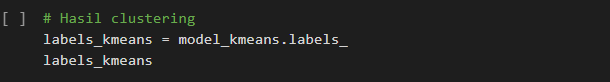

In [ ]:
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 0, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 0, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 1, 1, 1, 1, 4, 4, 4, 4],
      dtype=int32)

Karena kita menentukan K=5 (cluster berjumlah 5), maka kita akan mendapat 5 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method `cluster_centers_`.

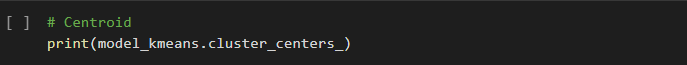

In [ ]:
print(model_kmeans.cluster_centers_)

[[-0.17079383 -0.15322869]
 [ 7.52694521 -0.11868539]
 [-0.11772005  0.91897759]
 [-0.09894748 -1.20506271]
 [ 0.37342132  4.15876808]]


# Evaluasi Model

Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:
1. Melihat dendrogram
2. Metode elbow
3. Visualisasi data
4. Silhouette Coefficient (SC)

Dendrogram digunakan pada model AHC.
Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)

Kita bisa memvisualisasikan hasil clustering dan centroid secara bersamaan menggunaan scatter plot.

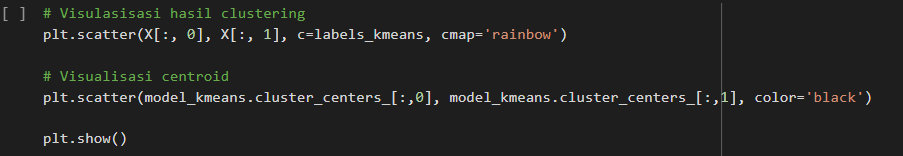

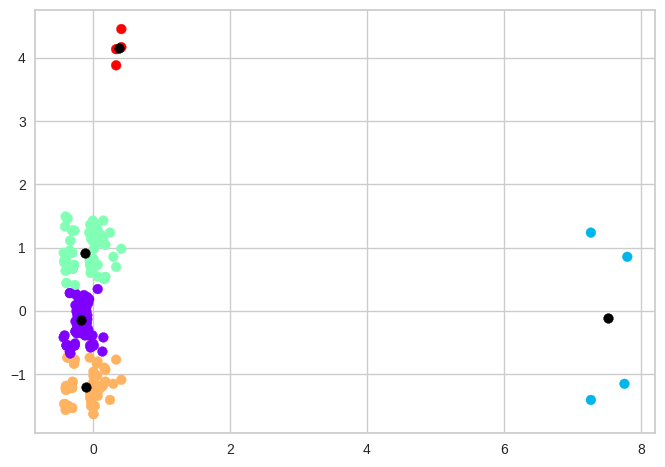

In [ ]:
# Visualisasi hasil clustering
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')

# Visualisasi centroid
plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], color='black')
plt.show()

Terlihat hasil clustering sudah cukup bagus.

---

**Note**:
- Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni **AnnualIncome** dan **SpendingScore**.
- Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
- Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
- Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).

Materi dimensionality reduction akan kita pelajari pada domain Data Science.

## Silhouette Coefficient

Kita bisa menggunakan `silhouette_score` untuk mendapat Silhouette Score model yang telah kita training.

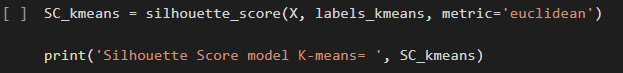

In [ ]:
SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')

print('Silhoutte Score model K-means= ', SC_kmeans)

Silhoutte Score model K-means=  0.5726323363898457


Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

Alangkah baiknya jika kita men-training lebih dari satu model clustering dengan berbagai algoritma dan tuning hyperparameter.

Kemudian, kita bandingkan Silhouette Score tiap model untuk mengetahui mana model terbagus.

# Kesimpulan

Simpan hasil clustering ke dalam dataset.

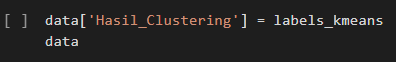

In [ ]:
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,2
3,Female,20,16,6,3
4,Female,23,16,77,2
5,Female,31,17,40,0
...,...,...,...,...,...
209,Female,35,1207,79,1
210,Female,45,126,182,4
211,Male,32,126,174,4


**Contoh**:

Menghitung rata-rata tiap cluster untuk menarik kesimpulan.

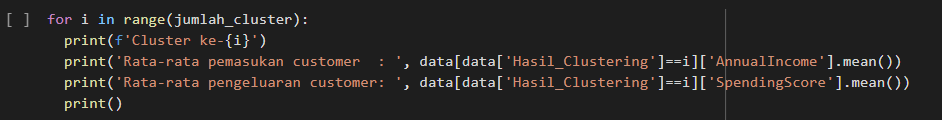

In [ ]:
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer : ', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer : ', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())

Cluster ke-0
Rata-rata pemasukan customer :  52.722772277227726
Rata-rata pengeluaran customer :  47.415841584158414
Cluster ke-1
Rata-rata pemasukan customer :  1167.0
Rata-rata pengeluaran customer :  48.5
Cluster ke-2
Rata-rata pemasukan customer :  60.4054054054054
Rata-rata pengeluaran customer :  81.06756756756756
Cluster ke-3
Rata-rata pemasukan customer :  63.12280701754386
Rata-rata pengeluaran customer :  14.403508771929825
Cluster ke-4
Rata-rata pemasukan customer :  131.5
Rata-rata pengeluaran customer :  182.75


Bisa kita simpulkan bahwa :    
- Cluster 0 adalah kelompok customer menengah ke bawah yang hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 2 adalah kelompok customer tingkat atas yang hemat (pengeluarannya sangat kecil)
- Cluster 3 adalah kelompok customer menengah ke atas yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 4 adalah kelompok customer menengah ke bawah yang boros (pengeluaran hampir sama dengan pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?



# Exercise (Latihan)

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1

- Gunakan dataset Mall_Customers.csv
- Gunakan variable Age, AnnualIncome, dan SpendingScore
- Lakukan clustering menggunakan model AHC dan K-Means
- Tentukan nilai K terbaik untuk setiap model
- Bandingkan SC model K-Means dengan AHC
- Tarik kesimpulan activity dan paparkan mana model terbaik

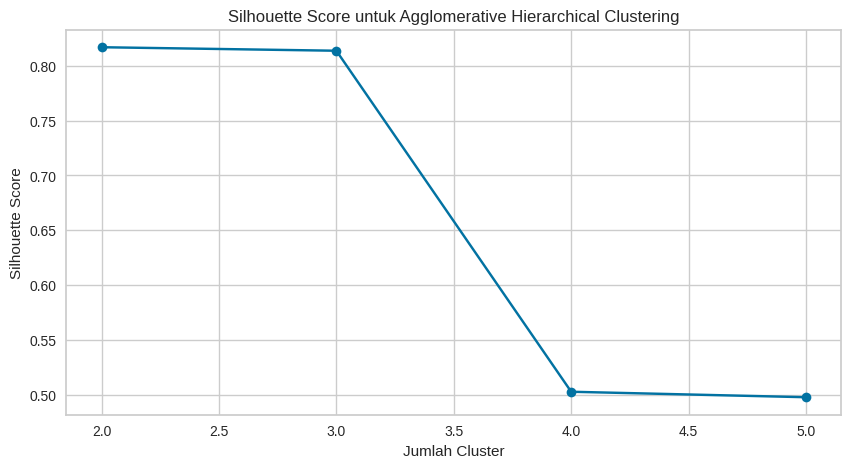

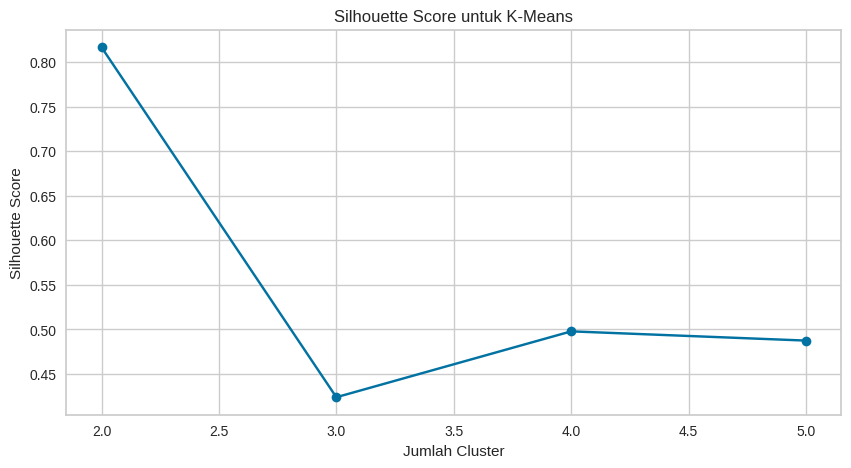

Jumlah cluster terbaik untuk AHC: 2 dengan Silhouette Score: 0.8167921910291142
Jumlah cluster terbaik untuk K-Means: 2 dengan Silhouette Score: 0.8167921910291142
Model terbaik adalah K-Means dengan Silhouette Score yang lebih tinggi.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 1. Memuat Dataset
df = pd.read_csv('Mall_Customers.csv')

# 2. Memilih variabel yang relevan
X = df[['Age', 'AnnualIncome', 'SpendingScore']]  # Sesuaikan nama kolom dengan yang benar

# 3. Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Menentukan jumlah cluster terbaik untuk AHC
sil_scores_ahc = []
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Membuat model AHC
    model_ahc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    labels = model_ahc.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)
    sil_scores_ahc.append(silhouette_avg)

# Plot Silhouette Score untuk AHC
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, sil_scores_ahc, marker='o')
plt.title("Silhouette Score untuk Agglomerative Hierarchical Clustering")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.show()

# 5. Menentukan jumlah cluster terbaik untuk K-Means
sil_scores_kmeans = []

for n_clusters in range_n_clusters:
    # Membuat model K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)
    sil_scores_kmeans.append(silhouette_avg)

# Plot Silhouette Score untuk K-Means
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, sil_scores_kmeans, marker='o')
plt.title("Silhouette Score untuk K-Means")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.show()

# 6. Menampilkan hasil terbaik
best_n_clusters_ahc = range_n_clusters[np.argmax(sil_scores_ahc)]
best_n_clusters_kmeans = range_n_clusters[np.argmax(sil_scores_kmeans)]

best_score_ahc = max(sil_scores_ahc)
best_score_kmeans = max(sil_scores_kmeans)

print(f"Jumlah cluster terbaik untuk AHC: {best_n_clusters_ahc} dengan Silhouette Score: {best_score_ahc}")
print(f"Jumlah cluster terbaik untuk K-Means: {best_n_clusters_kmeans} dengan Silhouette Score: {best_score_kmeans}")

# Kesimpulan: Membandingkan hasil clustering
if best_score_ahc > best_score_kmeans:
    print("Model terbaik adalah Agglomerative Hierarchical Clustering dengan Silhouette Score yang lebih tinggi.")
else:
    print("Model terbaik adalah K-Means dengan Silhouette Score yang lebih tinggi.")


## Activity 2

1. Buat kelompok
2. Carilah dataset untuk kasus clustering di sekitarmu atau di internet
3. Lakukan clustering menggunakan algortima K-Means (ikuti step pada hands-on ini)
4. Buat kesimpulan clustering
5. Kumpulkan ke HC

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


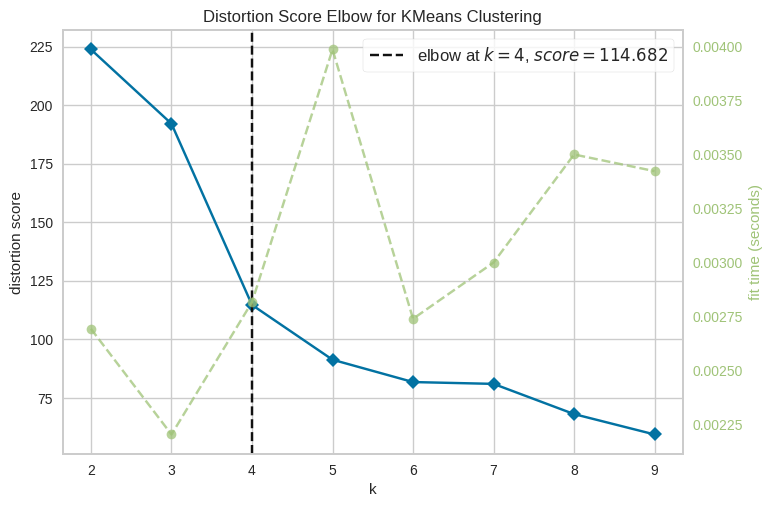

[[ 0.30830491 -0.41292574  0.55046001  0.5071935 ]
 [-0.73463631  1.45201075 -1.29704352 -1.21071997]
 [-1.34320731  0.12656736 -1.31407576 -1.30726051]
 [-0.3640806  -1.41420269  0.1074491   0.00175297]
 [ 1.30885058  0.18131103  1.12402312  1.17340915]]


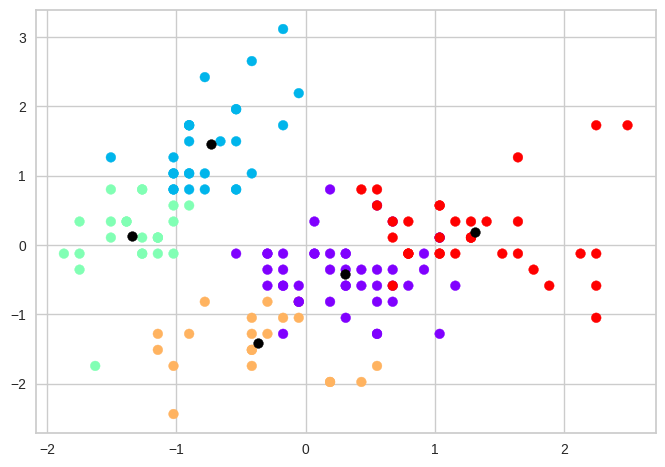

Silhoutte Score model K-means=  0.3472646487546106
Cluster ke-0
Rata-rata Sepal Length Cm :  6.097777777777777
Rata-rata Sepal Width Cm :  2.8755555555555556
Rata-rata Petal Lenght Cm :  4.726666666666667
Rata-rata Petal Width Cm :  1.5844444444444448
Cluster ke-1
Rata-rata Sepal Length Cm :  5.237037037037037
Rata-rata Sepal Width Cm :  3.681481481481481
Rata-rata Petal Lenght Cm :  1.477777777777778
Rata-rata Petal Width Cm :  0.2777777777777778
Cluster ke-2
Rata-rata Sepal Length Cm :  4.734782608695652
Rata-rata Sepal Width Cm :  3.108695652173913
Rata-rata Petal Lenght Cm :  1.4478260869565216
Rata-rata Petal Width Cm :  0.20434782608695654
Cluster ke-3
Rata-rata Sepal Length Cm :  5.542857142857143
Rata-rata Sepal Width Cm :  2.442857142857143
Rata-rata Petal Lenght Cm :  3.947619047619048
Rata-rata Petal Width Cm :  1.2000000000000002
Cluster ke-4
Rata-rata Sepal Length Cm :  6.923529411764705
Rata-rata Sepal Width Cm :  3.1323529411764706
Rata-rata Petal Lenght Cm :  5.73529411

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

!pip install -U yellowbrick

from yellowbrick.cluster import KElbowVisualizer

data = pd.read_csv('Iris.csv', index_col='Id')
data
data.info()

X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
X
X = StandardScaler().fit_transform(X)
X

tes_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(X)
visualizer.show()

# Hyperparameter tuning
jumlah_cluster = 5
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

#Training model
model_kmeans.fit(X)

labels_kmeans = model_kmeans.labels_
labels_kmeans
print(model_kmeans.cluster_centers_)

# Visualisasi hasil clustering
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')

# Visualisasi centroid
plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], color='black')
plt.show()

SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')
print('Silhoutte Score model K-means= ', SC_kmeans)

data['Hasil_Clustering'] = labels_kmeans
data

for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata Sepal Length Cm : ', data[data['Hasil_Clustering']==i]['SepalLengthCm'].mean())
  print('Rata-rata Sepal Width Cm : ', data[data['Hasil_Clustering']==i]['SepalWidthCm'].mean())
  print('Rata-rata Petal Lenght Cm : ', data[data['Hasil_Clustering']==i]['PetalLengthCm'].mean())
  print('Rata-rata Petal Width Cm : ', data[data['Hasil_Clustering']==i]['PetalWidthCm'].mean())